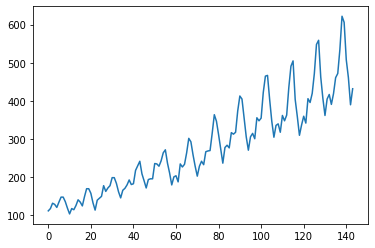

In [1]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('AirPassengers.csv',usecols=[1],engine='python')
plt.plot(dataset)
plt.show()

In [3]:
# MLP regression

In [4]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
numpy.random.seed(7)

In [6]:
dataset = dataset.values

In [7]:
dataset = dataset.astype('float32')

In [22]:
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [8]:
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train,test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train),len(test))

96 48


In [45]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return numpy.array(dataX),numpy.array(dataY)

In [47]:
look_back=1
trainX, trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test, look_back)

In [54]:
model = Sequential()
model.add(Dense(8,input_dim = look_back,activation="relu"))
model.add(Dense(1))
model.compile(loss = "mean_squared_error",optimizer = "adam")
model.fit(trainX,trainY,epochs=200,batch_size=2,verbose=2)

W0426 16:58:43.587568 140691999496000 deprecation.py:506] From /home/arvind/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1633: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0426 16:58:43.784261 140691999496000 deprecation.py:323] From /home/arvind/.local/lib/python3.6/site-packages/keras/optimizers.py:550: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.
W0426 16:58:43.928082 140691999496000 module_wrapper.py:136] From /home/arvind/.local/lib/python3.6/site-packages/tensorflow_core/python/util/module_wrapper.py:163: The name tf.global_variables is deprecated. Please use tf.c

Epoch 1/200
 - 0s - loss: 47555.9284
Epoch 2/200
 - 0s - loss: 41653.3919
Epoch 3/200
 - 0s - loss: 35699.0043
Epoch 4/200
 - 0s - loss: 29483.6718
Epoch 5/200
 - 0s - loss: 23393.8455
Epoch 6/200
 - 0s - loss: 17691.3700
Epoch 7/200
 - 0s - loss: 12745.1545
Epoch 8/200
 - 0s - loss: 8651.8868
Epoch 9/200
 - 0s - loss: 5562.2341
Epoch 10/200
 - 0s - loss: 3415.3183
Epoch 11/200
 - 0s - loss: 2055.5277
Epoch 12/200
 - 0s - loss: 1282.6550
Epoch 13/200
 - 0s - loss: 863.3661
Epoch 14/200
 - 0s - loss: 673.2044
Epoch 15/200
 - 0s - loss: 584.3995
Epoch 16/200
 - 0s - loss: 554.8133
Epoch 17/200
 - 0s - loss: 546.6272
Epoch 18/200
 - 0s - loss: 547.3683
Epoch 19/200
 - 0s - loss: 538.8246
Epoch 20/200
 - 0s - loss: 538.5317
Epoch 21/200
 - 0s - loss: 536.9810
Epoch 22/200
 - 0s - loss: 536.0283
Epoch 23/200
 - 0s - loss: 537.1247
Epoch 24/200
 - 0s - loss: 535.7827
Epoch 25/200
 - 0s - loss: 538.2108
Epoch 26/200
 - 0s - loss: 538.4736
Epoch 27/200
 - 0s - loss: 538.2303
Epoch 28/200
 - 0s

In [55]:
trainScore = model.evaluate(trainX,trainY,verbose=0)
print("Train Score %.2f MSE (%.2f RMSE)" %(trainScore,math.sqrt(trainScore)))
testScore = model.evaluate(testX,testY,verbose=0)
print("Test Score %.2f MSE (%.2f RMSE)" %(testScore,math.sqrt(testScore)))


Train Score 531.71 MSE (23.06 RMSE)
Test Score 2355.06 MSE (48.53 RMSE)


In [56]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [57]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict

In [58]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict

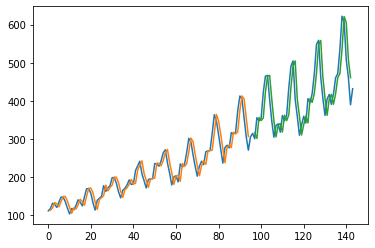

In [59]:
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [60]:
# MLP using the window method

In [62]:
def create_dataset(dataset,look_back=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return numpy.array(dataX),numpy.array(dataY)

In [63]:
numpy.random.seed(7)

In [64]:
look_back = 10

In [66]:
trainX,trainY = create_dataset(train,look_back)
testX,testY = create_dataset(test,look_back)

In [67]:
model = Sequential()
model.add(Dense(8,input_dim=look_back,activation="relu"))
model.add(Dense(1))
model.compile(loss = "mean_squared_error",optimizer = "adam")
model.fit(trainX,trainY,epochs = 200,batch_size=2,verbose=2)

Epoch 1/200
 - 0s - loss: 88109.7045
Epoch 2/200
 - 0s - loss: 61204.0175
Epoch 3/200
 - 0s - loss: 45815.9598
Epoch 4/200
 - 0s - loss: 30762.1070
Epoch 5/200
 - 0s - loss: 16606.9325
Epoch 6/200
 - 0s - loss: 6863.6326
Epoch 7/200
 - 0s - loss: 2538.2402
Epoch 8/200
 - 0s - loss: 1375.1444
Epoch 9/200
 - 0s - loss: 1190.9321
Epoch 10/200
 - 0s - loss: 1165.6686
Epoch 11/200
 - 0s - loss: 1165.8791
Epoch 12/200
 - 0s - loss: 1156.1145
Epoch 13/200
 - 0s - loss: 1146.5375
Epoch 14/200
 - 0s - loss: 1152.3337
Epoch 15/200
 - 0s - loss: 1148.5767
Epoch 16/200
 - 0s - loss: 1138.7788
Epoch 17/200
 - 0s - loss: 1148.2691
Epoch 18/200
 - 0s - loss: 1131.1921
Epoch 19/200
 - 0s - loss: 1143.7408
Epoch 20/200
 - 0s - loss: 1133.2917
Epoch 21/200
 - 0s - loss: 1125.7523
Epoch 22/200
 - 0s - loss: 1128.9423
Epoch 23/200
 - 0s - loss: 1120.3594
Epoch 24/200
 - 0s - loss: 1113.8314
Epoch 25/200
 - 0s - loss: 1120.7597
Epoch 26/200
 - 0s - loss: 1122.4006
Epoch 27/200
 - 0s - loss: 1122.6049
Epoch

In [68]:
trainScore = model.evaluate(trainX,trainY,verbose=0)

In [69]:
print('Train Score: %.2f MSE (%.2f RMSE)' %(trainScore,math.sqrt(trainScore)))

Train Score: 606.05 MSE (24.62 RMSE)


In [70]:
print('Test Score: %.2f MSE (%.2f RMSE)'%(testScore, math.sqrt(testScore)))

Test Score: 2355.06 MSE (48.53 RMSE)


In [71]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [72]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict

In [73]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict

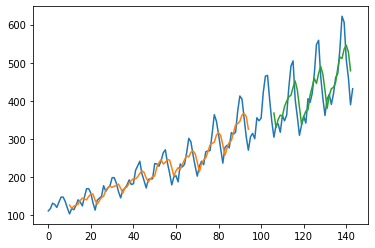

In [74]:
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()